## 파이썬을 활용한 모델링

### CH1. SVM

In [574]:
##패키지 로드
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import matplotlib.colors as colors
import random
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [575]:
##씨드 고정
def seed_everything(seed):
    random.seed(int(seed))
    np.random.seed(int(seed))
    os.environ["PYTHONHASHSEED"] = str(seed)
    tf.random.set_seed(int(seed))
seed_everything('2728')

In [576]:
#데이터 로드
data1 = pd.read_csv("C:/Users/User/Desktop/주분3주차패키지/data1.csv")
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [577]:
# 데이터 라벨 바꾸기
data1['target'] = data1['target'].map({'versicolor':1,'setosa':0,'virginica':2})

In [578]:
X, y = data1.iloc[:, 0:2], data1.iloc[:,-1]

In [579]:
# 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2728)

In [580]:
# 하이퍼파라미터 정하기
param_grid1 = [{'kernel':['linear'], 'C':[0.01, 0.1, 1, 10, 30, 50, 70]}]

In [581]:
#그리드 서치
clf1 = svm.SVC(random_state = 2728) 

In [582]:
grid_search1 = GridSearchCV(clf1, param_grid = param_grid1, cv = 5, scoring = 'accuracy', refit=True)

In [583]:
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=2728),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 30, 50, 70],
                          'kernel': ['linear']}],
             scoring='accuracy')

In [584]:
# 최적 파라미터, 스코어 출력
print('최적 조합 : ', grid_search1.best_params_)
print('스코어 : ', grid_search1.best_score_)

최적 조합 :  {'C': 1, 'kernel': 'linear'}
스코어 :  0.819047619047619


In [585]:
# 테스트 데이터에 대해 예측후 확인
y_pred1 = grid_search1.predict(X_test)
print('혼동 행렬 : ', confusion_matrix(y_test, y_pred1))

혼동 행렬 :  [[20  0  0]
 [ 0  7  3]
 [ 0  7  8]]


In [586]:
# Decision Boundary 그리기
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [587]:
Z1 = grid_search1.predict(np.c_[xx.ravel(), yy.ravel()])

In [588]:
Z1 = Z1.reshape(xx.shape)

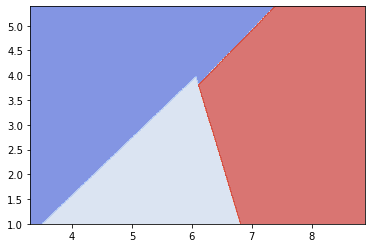

In [590]:
plt.contourf(xx, yy, Z1, cmap=plt.cm.coolwarm, alpha=0.7)

In [592]:
X.iloc[:, 0].shape

(150,)

Text(0.5, 1.0, 'SVM')

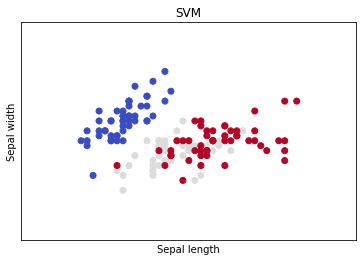

In [591]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y.values, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVM')

In [543]:
# 방법2
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

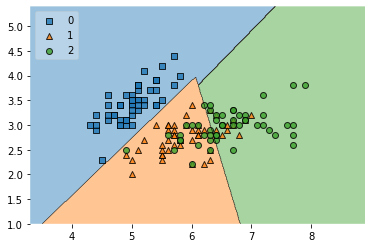

In [544]:
plot_decision_regions(X=np.array(X), 
                      y=np.array(y),
                      clf=grid_search1, 
                      legend=2)

### 2. LGBM

In [545]:
data3 = pd.read_csv("C:/Users/User/Desktop/주분3주차패키지/data2.csv")

In [546]:
data3.head()

,target,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [547]:
data3.shape

(20640, 9)

In [548]:
X = data3.iloc[:,1:]
y = data3.iloc[:,0]

In [549]:
# 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2728)

In [550]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(n_estimators=200, random_state = 2728)

In [551]:
params = {'max_depth': [10, 20],
          'min_child_samples': [20, 40, 60, 80],
         'num_leaves':[60, 70, 80]}

grid = GridSearchCV(lgbm, param_grid=params, cv = 5, refit = True, verbose = False)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(n_estimators=200, random_state=2728),
             param_grid={'max_depth': [10, 20],
                         'min_child_samples': [20, 40, 60, 80],
                         'num_leaves': [60, 70, 80]},
             verbose=False)

In [552]:
print("최적 파라미터: ", grid.best_params_)
print('스코어 : ', grid.best_score_)

최적 파라미터:  {'max_depth': 20, 'min_child_samples': 40, 'num_leaves': 70}
스코어 :  0.8426104755096642


In [553]:
# 위 결과를 적용하여 재학습
lgbm = LGBMRegressor(n_estimators=200, num_leaves=70, max_depth = 20, min_child_samples = 40, random_sate = 2728)

evals = [(X_test, y_test)]
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='mse',
         eval_set=evals, verbose=50)

Training until validation scores don't improve for 100 rounds
[50]	valid_0's l2: 0.215022
[100]	valid_0's l2: 0.20389
[150]	valid_0's l2: 0.202002
[200]	valid_0's l2: 0.201827
Did not meet early stopping. Best iteration is:
[172]	valid_0's l2: 0.201571


LGBMRegressor(max_depth=20, min_child_samples=40, n_estimators=200,
              num_leaves=70, random_sate=2728)

In [554]:
# RMSE 구하기
y_pred2 = lgbm.predict(X_test)
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, y_pred2) 
RMSE = np.sqrt(MSE)
print('RMSE : ', RMSE)

RMSE :  0.44896689508565013


### 3. LSTM

In [593]:
# 데이터 로드
samsung = pd.read_csv("C:/Users/User/Desktop/주분3주차패키지/samsung.csv")

In [594]:
samsung.head()

,Date,Price,Open,High,Low,Vol.
0,2019-10-01,"48,850","48,900","49,100","48,650",6.20M
1,2019-10-02,"47,600","48,350","48,400","47,600",8.37M
2,2019-10-03,"47,600","47,600","47,600","47,600",-
3,2019-10-04,"48,000","47,400","48,650","47,350",8.46M
4,2019-10-06,"48,000","48,000","48,000","48,000",-


In [595]:
print(samsung.shape)

(627, 6)


In [596]:
# 콤마제거
def remove_comma(x):
    return x.replace(',', '')

In [597]:
samsung['Price'] = samsung['Price'].apply(remove_comma)
samsung['Open'] = samsung['Open'].apply(remove_comma)
samsung['High'] = samsung['High'].apply(remove_comma)
samsung['Low'] = samsung['Low'].apply(remove_comma)

In [598]:
# 수치형으로 바꾸기
samsung = samsung.astype({'Price':'float64',
                          'Open':'float64',
             'High':'float64',
             'Low':'float64'})

In [599]:
samsung.head()

,Date,Price,Open,High,Low,Vol.
0,2019-10-01,48850.0,48900.0,49100.0,48650.0,6.20M
1,2019-10-02,47600.0,48350.0,48400.0,47600.0,8.37M
2,2019-10-03,47600.0,47600.0,47600.0,47600.0,-
3,2019-10-04,48000.0,47400.0,48650.0,47350.0,8.46M
4,2019-10-06,48000.0,48000.0,48000.0,48000.0,-


In [600]:
# 테스트 데이터 분리

TEST_SIZE = 60
WINDOW_SIZE = 20

train = samsung[:-TEST_SIZE]
test = samsung[-TEST_SIZE:]

In [601]:
from sklearn.preprocessing import MinMaxScaler

# 스케일링
scaler = MinMaxScaler()
scale_cols = ['Price', 'Open', 'High', 'Low']

train_scaled = scaler.fit_transform(train[scale_cols])
train_scaled = pd.DataFrame(train_scaled)
train_scaled.columns = scale_cols

test_scaled = scaler.transform(test[scale_cols])
test_scaled = pd.DataFrame(test_scaled)
test_scaled.columns = scale_cols

In [602]:
train_scaled.head(3)

,Price,Open,High,Low
0,0.130928,0.131524,0.104421,0.133124
1,0.105155,0.120042,0.091251,0.111111
2,0.105155,0.104384,0.076199,0.111111


In [603]:
test_scaled.head(3)

,Price,Open,High,Low
0,0.653608,0.661795,0.593603,0.664570
1,0.647423,0.653445,0.584196,0.645702
2,0.630928,0.645094,0.580433,0.645702


In [604]:
# Window size 별로 데이터 자르기
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [605]:
from sklearn.model_selection import train_test_split

#데이터 자른 후 Validation셋 분리
feature_cols = ['Open', 'High', 'Low']
label_cols = ['Price']

train_feature = train_scaled[feature_cols]
train_label = train_scaled[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((437, 20, 3), (110, 20, 3))

In [606]:
# 테스트셋도 똑같이 변환
test_feature = test_scaled[feature_cols]
test_label = test_scaled[label_cols]

test_feature.shape, test_label.shape

test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((40, 20, 3), (40, 1))

In [607]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from keras.layers import Dense, Dropout, Activation

In [570]:
# 모델 만들기
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(64))
model.add(Dropout(0.3))
model.add(Dense(64))
model.add(Dense(1))

In [571]:
# Fitting
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
early_stop = EarlyStopping(patience=20)
model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
model.fit(x_train, y_train, 
                                    epochs=100, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/100
28/28 [==============================] - 2s 15ms/step - loss: 0.1105 - mse: 0.1105 - val_loss: 0.0088 - val_mse: 0.0088

Epoch 00001: val_loss improved from inf to 0.00876, saving model to model\tmp_checkpoint.h5
Epoch 2/100
28/28 [==============================] - 0s 5ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0029 - val_mse: 0.0029

Epoch 00002: val_loss improved from 0.00876 to 0.00292, saving model to model\tmp_checkpoint.h5
Epoch 3/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0019 - val_mse: 0.0019

Epoch 00003: val_loss improved from 0.00292 to 0.00194, saving model to model\tmp_checkpoint.h5
Epoch 4/100
28/28 [==============================] - 0s 6ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0019 - val_mse: 0.0019

Epoch 00004: val_loss improved from 0.00194 to 0.00186, saving model to model\tmp_checkpoint.h5
Epoch 5/100
28/28 [==============================] - 0s 7ms/step - loss: 0.0048 - mse: 0.00

In [572]:
# Predict
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

(40, 1)

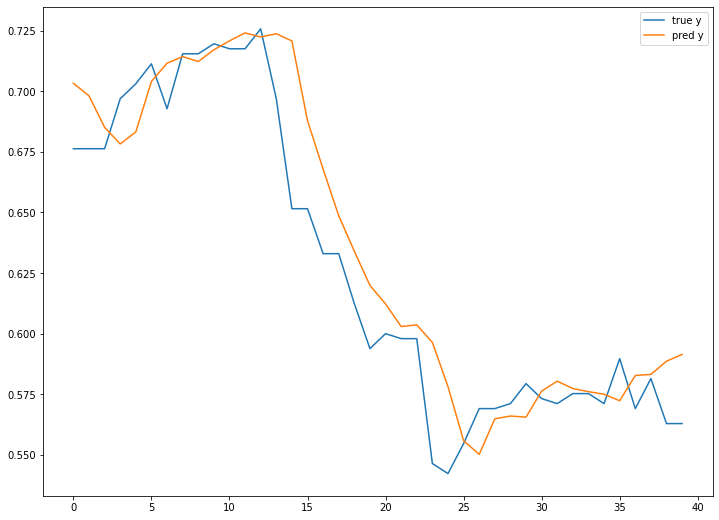

In [573]:
# 그래프 그려 확인
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'true y')
plt.plot(pred, label = 'pred y')
plt.legend()
plt.show()